In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

Importing MNIST dataset using keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

Checking the dimension of the dataset

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


Plotting the pixels into image

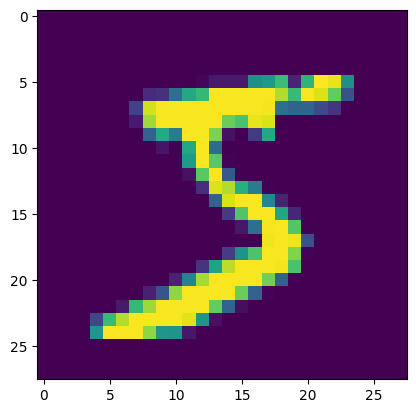

In [5]:
plt.imshow(x_train[0])

This is done on input data for more accurate prediction

In [6]:
x_train = x_train/255
x_test = x_test/255

Flatten the data into 1D array for inputs of first layer

In [7]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [8]:
x_test_flat.shape

(10000, 784)

In [9]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Using Sequential to train the model

In [10]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training happens here

In [12]:
model.fit(x_train_flat,y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2699 - accuracy: 0.9233
Epoch 2/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1221 - accuracy: 0.9638
Epoch 3/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9749
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9796
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9866


Scores and evaluating the model

In [13]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9783


[0.07316048443317413, 0.9782999753952026]

Testing the data

In [14]:
y_pred=model.predict(x_test_flat)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.0016542e-03, 3.5666008e-04, 3.1916987e-02, ..., 9.9988931e-01,
        8.8234842e-02, 7.8928357e-01],
       [4.3918028e-02, 9.2384303e-01, 9.9999976e-01, ..., 3.8383074e-08,
        7.0768762e-01, 2.2512847e-06],
       [3.1629889e-03, 9.9921143e-01, 1.2600423e-01, ..., 3.1884462e-01,
        1.8884860e-01, 1.0838649e-03],
       ...,
       [6.1510743e-09, 4.4125820e-05, 8.9764126e-07, ..., 2.3484753e-01,
        5.8848917e-01, 9.7362846e-01],
       [3.7354126e-04, 5.4259661e-05, 7.9474381e-07, ..., 1.0790768e-03,
        9.0253395e-01, 2.6232784e-04],
       [1.4949818e-01, 1.2287777e-06, 5.4427128e-02, ..., 1.8590835e-06,
        5.8719181e-02, 5.0174812e-04]], dtype=float32)

Out of the 10 outputs which highest value matches with a particular number

In [15]:
y_predicted=y_pred.argmax(axis=1)
y_predicted

array([7, 2, 1, ..., 4, 5, 6])

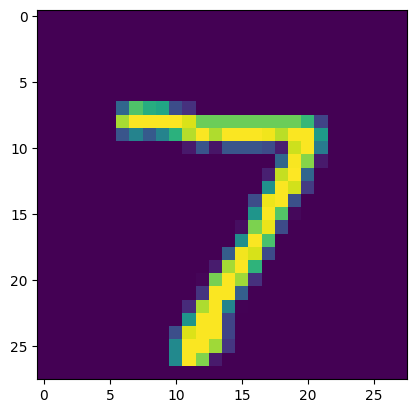

In [16]:
plt.imshow(x_test[0])

##The image matches with the predicted i.e. 7